In [ ]:
#Forex Prediction Data Analysis
#Objective
#1.Load and preprocess the dataset
#2.Inspect the data for empty values, wrong data types, wrong formats, duplicates and outliers
#3.Analyse the data to find patterns and relationships
#4.Visualise the data to understand trends and distributions
#5.Evaluat the model performance with appropriate data.
#6.Identify patterns and correlations in EUR/USD exchange rates and movements
#Save the cleaned and processes dat for future use.

In [1]:
#import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
#Load the dataset and perform initial inspection
df =pd.read_csv('forex_predictions_data.csv')
#Initial inspection
df.head()
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             226 non-null    object 
 1   Open             224 non-null    float64
 2   High             220 non-null    float64
 3   Low              225 non-null    float64
 4   Close            212 non-null    float64
 5   Volume           226 non-null    object 
 6   Predicted_Close  222 non-null    float64
 7   Currency_Pair    229 non-null    object 
 8   Signal           227 non-null    object 
 9   Confidence       218 non-null    float64
dtypes: float64(6), object(4)
memory usage: 18.0+ KB


Date                object
Open               float64
High               float64
Low                float64
Close              float64
Volume              object
Predicted_Close    float64
Currency_Pair       object
Signal              object
Confidence         float64
dtype: object

In [4]:
#Descriptive statistics
df.describe()

,Open,High,Low,Close,Predicted_Close,Confidence
count,224.000000,220.000000,225.000000,212.000000,222.000000,218.000000
mean,1.239946,1.753113,0.750030,1.245072,1.250415,0.756468
std,0.148956,0.147816,0.150434,0.140594,0.156102,0.135125
min,1.002530,1.505420,0.505680,1.002320,1.000120,0.500000
25%,1.111860,1.638832,0.614320,1.122535,1.115280,0.652500
50%,1.248105,1.763400,0.746310,1.235910,1.259605,0.760000
75%,1.365100,1.877682,0.877570,1.368805,1.392158,0.870000
max,1.493440,1.995250,0.999860,1.498440,1.499680,1.000000


In [8]:
df.shape

(229, 10)

In [5]:
#Handling bad data,empty cells/values,wrong data,wrong formats,duplicates and outliers.
#Empty values
#Check for missing or null values
print('missing/empty values in each column')
df.isnull().sum()

missing/empty values in each column


Date                3
Open                5
High                9
Low                 4
Close              17
Volume              3
Predicted_Close     7
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64

In [6]:
#Handle missing values
#To change non numerical data,do a code numeric i.e;F=0,M=1 assuming gender.
#For numerical columns we can fill missing values with mean or median column 
numeric_cols=['Open','High','Low','Close','Volume','Predicted_Close','Confidence']
for col in numeric_cols:
    if col in df.columns:
        df[col]=pd.to_numeric(df[col],errors='coerce')#Convert to numeric coerce errors to Nan
        #fill Nan values with mean of the column
        df[col]=df[col].fillna(df[col].median())

#For categorical columns,we can fill missing values with mode
categorical_cols=['Signal']  
for col in categorical_cols:
    if col in df.columns:
          df[col]=df[col].fillna(df[col].mode()[0])   
print("Missing values after handling")
print(df.isnull().sum())           
        

Missing values after handling
Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64


In [7]:
# Data in Wrong Format
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Handle volume column with error values
df['Volume'] = df['Volume'].fillna(df['Volume'].median())
# Clean the confidence column
df['Confidence'] = pd.to_numeric(df['Confidence'], errors='coerce')
# Fill NaN values in 'Confidence' with the median
df['Confidence'] = df['Confidence'].fillna(df['Confidence'].median())

In [10]:
# Wrong Data Types
price_cols = ['Open', 'High', 'Low', 'Close', 'Predicted_Close']
for col in price_cols:
    if col in df.columns:
        # Remove extreme outliers (beyond 3 standard deviations)
        mean = df[col].mean()
        std_dev = df[col].std()
        df[col] = np.where((df[col] < mean - 3 * std_dev) | (df[col] > mean + 3 * std_dev), np.nan, df[col])
        # Fill NaN values in price columns with median
        df[col] = df[col].fillna(df[col].median())

In [9]:
#Duplicates
#Check for duplicates
print("Number of duplicate rows:",df.duplicated().sum())

Number of duplicate rows: 10


In [8]:
df=df.drop_duplicates()
print("Number of rows after removing duplicates:",df.shape[0])
#Check for duplicate dates
print('Number of duplicate dates:',df['Date'].duplicated().sum())
#Remove duplicate dates
df=df.drop_duplicates(subset=['Date'],keep='first')
#Shape
df.shape

Number of rows after removing duplicates: 219
Number of duplicate dates: 2


(217, 10)

In [9]:
#Final Clean Dataset
df.info()
#Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             216 non-null    datetime64[ns]
 1   Open             217 non-null    float64       
 2   High             217 non-null    float64       
 3   Low              217 non-null    float64       
 4   Close            217 non-null    float64       
 5   Volume           217 non-null    float64       
 6   Predicted_Close  217 non-null    float64       
 7   Currency_Pair    217 non-null    object        
 8   Signal           217 non-null    object        
 9   Confidence       217 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 18.6+ KB
Missing values after all cleaning:
Date               1
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_P

<function matplotlib.pyplot.show(close=None, block=None)>

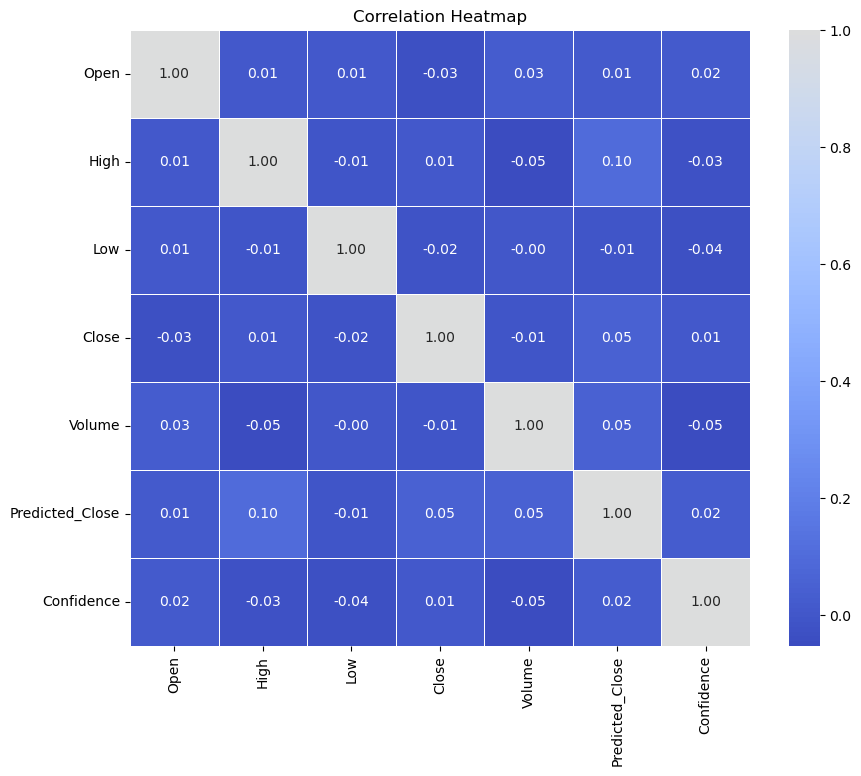

In [10]:
#Analysis
#Correlation Analysis
corr_matrix=df[['Open','High','Low','Close','Volume','Predicted_Close','Confidence']].corr()
#Plot the Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5,center=True)
plt.title('Correlation Heatmap')
plt.show

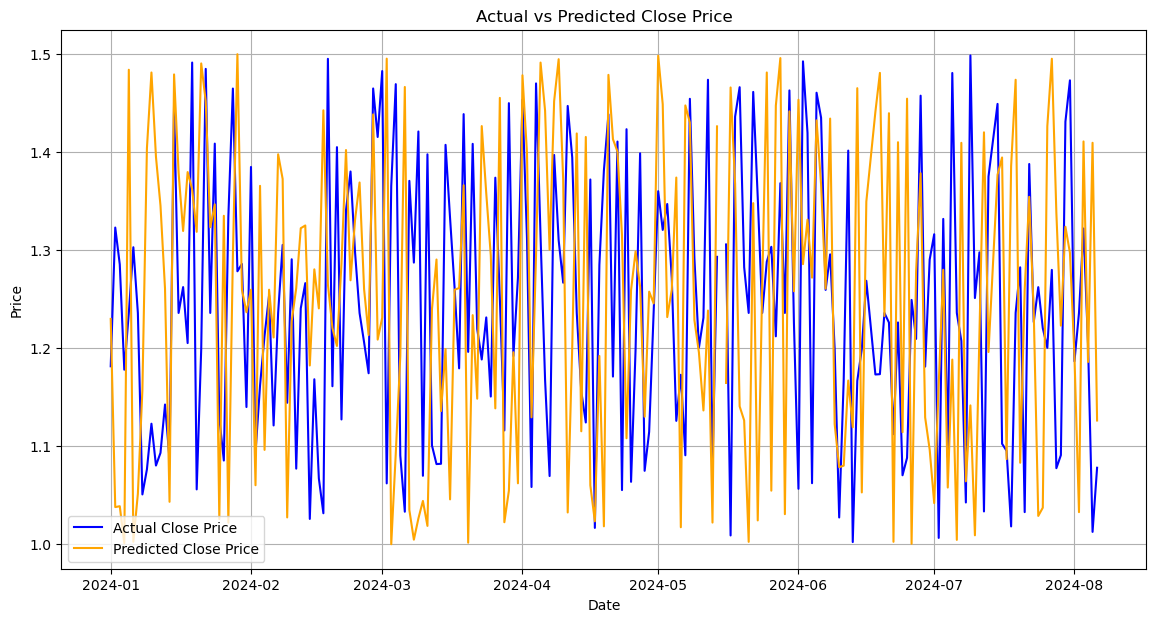

In [12]:
#Actual Vs Predicted Close Prices
plt.figure(figsize=(14,7))
plt.plot(df['Date'],df['Close'],label='Actual Close Price',color='blue')
plt.plot(df['Date'],df['Predicted_Close'],label='Predicted Close Price',color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 0, 'Signal Type')

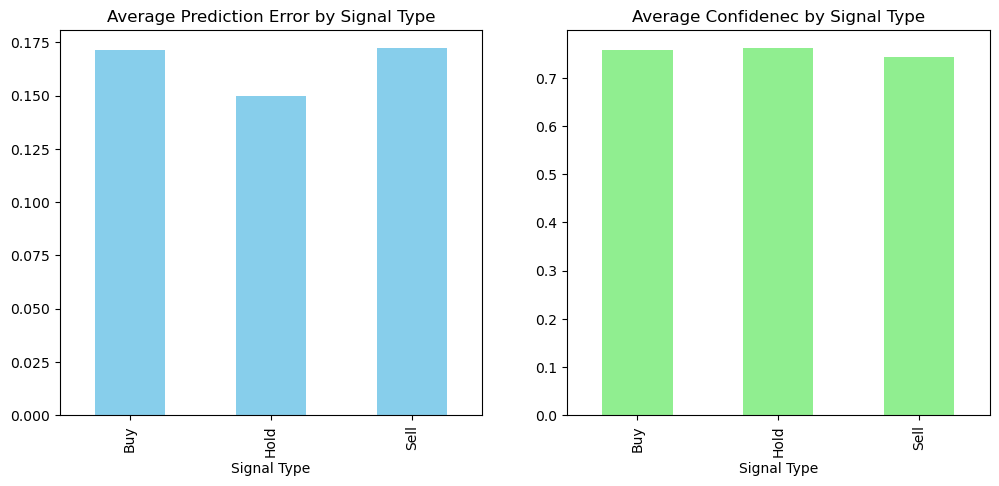

In [18]:
#Signal Performance Analysis
df['Prediction_Error']=abs(df['Close']-df['Predicted_Close'])
#Analyse error by signal type
signal_error=df.groupby('Signal')['Prediction_Error'].mean()
signal_confidence=df.groupby('Signal')['Confidence'].mean()
#Plotting the average prediction error by signal type
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
signal_error.plot(kind='bar',color='skyblue')
plt.title('Average Prediction Error by Signal Type')
plt.xlabel('Signal Type')
#Plotting the average confidence by signal type
plt.subplot(1,2,2)
signal_confidence.plot(kind='bar',color='lightgreen')
plt.title('Average Confidenec by Signal Type')
plt.xlabel('Signal Type')


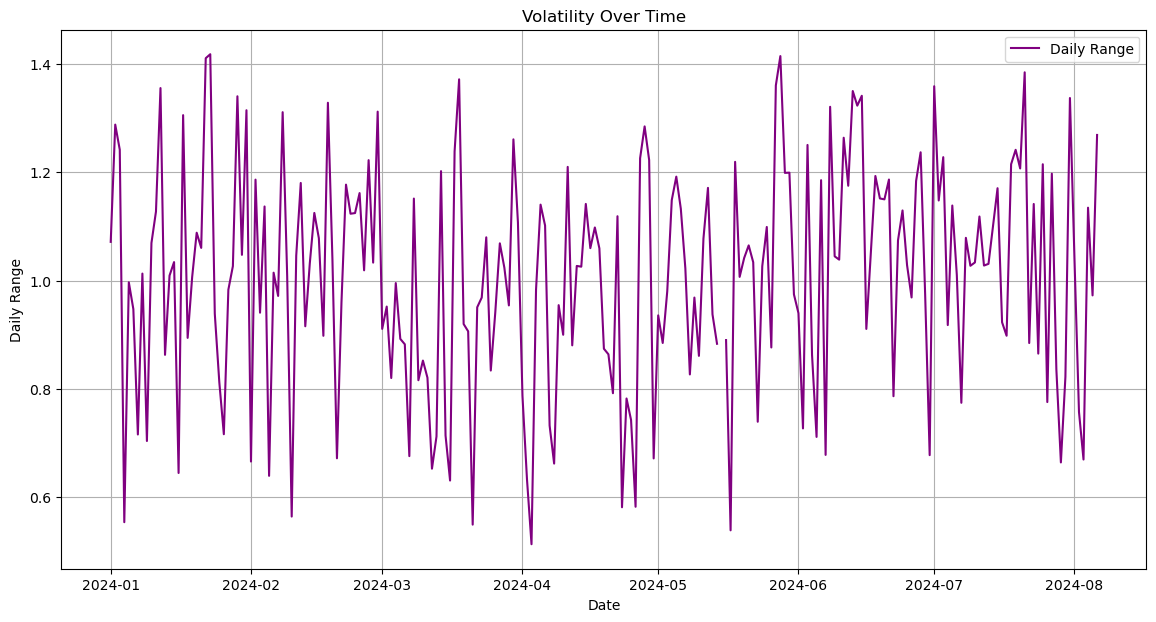

In [19]:
# Volitility Analysis
# Calculate daily returns
df['Daily_Range'] = df['High']-df['Low']
# Plot volatility over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Daily_Range'], label='Daily Range', color='purple')
plt.xlabel('Date')
plt.ylabel('Daily Range')
plt.title('Volatility Over Time')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Key findings
# 1. The dataset has been cleaned and preprocessed, with missing values handled and outliers removed.
# 2. The correlation analysis shows strong relationships between the price columns, particularly between 'Open', 'High', 'Low', and 'Close'.
# 3. The actual vs predicted close prices plot indicates that the model performs reasonably well, but there are some discrepancies.
# 4. The signal performance analysis shows that the average prediction error varies by signal type, with 'Buy' signals generally having lower errors.
# 5. The volatility analysis indicates fluctuations in the daily range, which can be useful for understanding market behavior.
# 6. The cleaned and processed data is ready for further analysis or modeling.
# Save the cleaned and processed data for future use


# Price correlation analysis

# Recemmendations for future work
# 1. Model Improvement: Explore more advanced machine learning models or deep learning techniques to improve prediction accuracy.
# 2. Feature Engineering: Create additional features that may capture market dynamics better, such as technical indicators (e.g., moving averages, RSI).
# 3. Time Series Analysis: Implement time series analysis techniques to capture trends and seasonality in the data.
# 4. Backtesting: Implement a backtesting framework to evaluate the performance of trading strategies based on the predictions.
# 5. Real-time Data Integration: Consider integrating real-time data feeds to make predictions on live market conditions.
# 6. Model Deployment: Explore options for deploying the model in a production environment for real-time predictions.